## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [1]:
import matplotlib.pyplot as plt

In [3]:
import cv2

In [8]:
im =  cv2.imread('elephant.jpg') #Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)


(330, 500, 3)


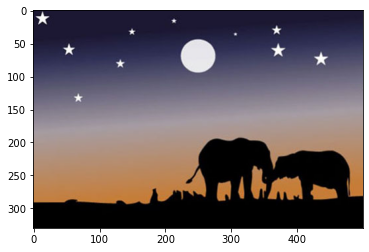

In [9]:
plt.imshow(im) # as RGB Format
plt.show()

In [18]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)#we converted into each row for the each channel

(165000, 3)


In [19]:
from sklearn.cluster import KMeans

In [20]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(n_clusters=4)

In [21]:
centers = km.cluster_centers_

In [22]:
import numpy as np
centers = np.array(centers,dtype='uint8')

In [24]:
print(centers)
##The four most dominat colours with the rgb values

[[174 145 128]
 [ 37  35  64]
 [  1   0   1]
 [ 98  94 117]]


### Plot what all colors are these ?

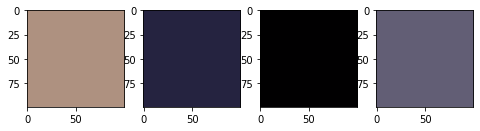

In [27]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    #plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


## Segmenting Our Original Image

In [32]:
new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)


(165000, 3)


In [33]:
colors

[array([174, 145, 128], dtype=uint8),
 array([37, 35, 64], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([ 98,  94, 117], dtype=uint8)]

In [34]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [35]:
km.labels_.shape

(165000,)

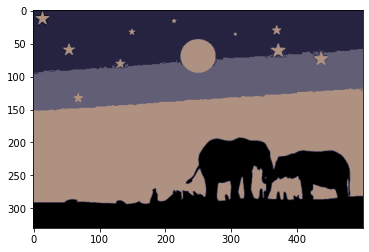

In [36]:

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
    
    
